In [65]:
import pandas as pd
import numpy as np

In [66]:
data = pd.read_csv("meteofrance_data.csv", sep = ";")

In [67]:
data.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJHH,RR1,QRR1,DRR1,QDRR1,...,INS,QINS,INS2,QINS2,TLAGON,QTLAGON,TVEGETAUX,QTVEGETAUX,ECOULEMENT,QECOULEMENT
0,20004002,AJACCIO,41.918,8.792667,5,2023010100,0.0,1.0,0.0,9.0,...,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
1,20004002,AJACCIO,41.918,8.792667,5,2023010101,0.0,1.0,0.0,9.0,...,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2,20004002,AJACCIO,41.918,8.792667,5,2023010102,0.0,1.0,0.0,9.0,...,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
3,20004002,AJACCIO,41.918,8.792667,5,2023010103,0.0,1.0,0.0,9.0,...,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
4,20004002,AJACCIO,41.918,8.792667,5,2023010104,0.0,1.0,0.0,9.0,...,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
data.shape

(560346, 204)

In [69]:
colonnes_a_garder = ['AAAAMMJJHH', 'TD', 'U', ' T', 'TX', 'TN', 'RR1', 'PSTAT']
df = data[colonnes_a_garder]

In [70]:
df.head()

,AAAAMMJJHH,TD,U,T,TX,TN,RR1,PSTAT
0,2023010100,10.0,94.0,11.0,11.0,9.7,0.0,1029.4
1,2023010101,9.2,92.0,10.4,10.9,9.9,0.0,1029.4
2,2023010102,9.2,95.0,9.9,10.3,9.0,0.0,1029.3
3,2023010103,8.4,92.0,9.6,10.1,9.5,0.0,1028.9
4,2023010104,8.0,89.0,9.7,10.5,9.7,0.0,1028.6


In [71]:
df['AAAAMMJJHH'] = pd.to_datetime(df['AAAAMMJJHH'], format='%Y%m%d%H')

/tmp/ipykernel_18358/1953429037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AAAAMMJJHH'] = pd.to_datetime(df['AAAAMMJJHH'], format='%Y%m%d%H')


In [72]:
df.head()

,AAAAMMJJHH,TD,U,T,TX,TN,RR1,PSTAT
0,2023-01-01 00:00:00,10.0,94.0,11.0,11.0,9.7,0.0,1029.4
1,2023-01-01 01:00:00,9.2,92.0,10.4,10.9,9.9,0.0,1029.4
2,2023-01-01 02:00:00,9.2,95.0,9.9,10.3,9.0,0.0,1029.3
3,2023-01-01 03:00:00,8.4,92.0,9.6,10.1,9.5,0.0,1028.9
4,2023-01-01 04:00:00,8.0,89.0,9.7,10.5,9.7,0.0,1028.6


In [73]:
df.rename(columns={
    'AAAAMMJJHH' : 'date' ,
    'TD': 'dewpoint',
    'U': 'humidity',
    ' T': 'temperature',
    'TX': 'temperature max',
    'TN': 'temperature min',
    'RR1': 'rain',
    'PSTAT': 'pressure'
}, inplace=True)

/tmp/ipykernel_18358/3881505444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


In [74]:
from skimpy import *
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 560346 │ │ float64     │ 7     │                                                          │
│ │ Number of columns │ 8      │ │ datetime64  │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA       ┃ NA %    ┃ mean   ┃ sd    ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ dewpoint            │   274712 │   49.03 │    7.7 │   7.3 │  -46 │   3.6 │   8.1 │    12 │    26 │    ▂▇▂  │  │
│ │ humidity            │   274695 │   49.02 │     69 │    20 │    2 │    56 │    71 │    85 │   100 │  ▁▃▇▇▇  │  │
│ │ temperature         │     1104 │     0.2 │     14 │   7.8 │  -13 │   8.5 │    13 │    19 │    42 │   ▂▇▅▂  │  │
│ │ temperature max     │    22838 │    4.08 │     15 │   7.6 │  -10 │   9.4 │    14 │    20 │    43 │   ▃▇▅▂  │  │
│ │ temperature min     │    22709 │    4.05 │     14 │   7.4 │  -11 │   8.4 │    13 │    19 │    42 │   ▃▇▅▂  │  │
│ │ rain                │    24499 │    4.37 │    0.1 │  0.73 │    0 │     0 │     0 │     0 │    77 │    ▇    │  │
│ │ pressure            │   465595 │   83.09 │   1000 │    10 │  970 │  1000 │  1000 │  1000 │  1000 │  ▁▅▇▅▁  │  │
│ └─────────────────────┴──────────┴─────────┴────────┴───────┴──────┴───────┴───────┴───────┴───────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA    ┃ NA %     ┃ first            ┃ last                           ┃ frequency      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩  │
│ │ date               │     0 │        0 │    2023-01-01    │      2024-03-20 03:00:00       │ None           │  │
│ └────────────────────┴───────┴──────────┴──────────────────┴────────────────────────────────┴────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

colonnes_num = df.select_dtypes(include=['int64', 'float64'])

In [76]:
colonnes_num_corr = colonnes_num.corr()

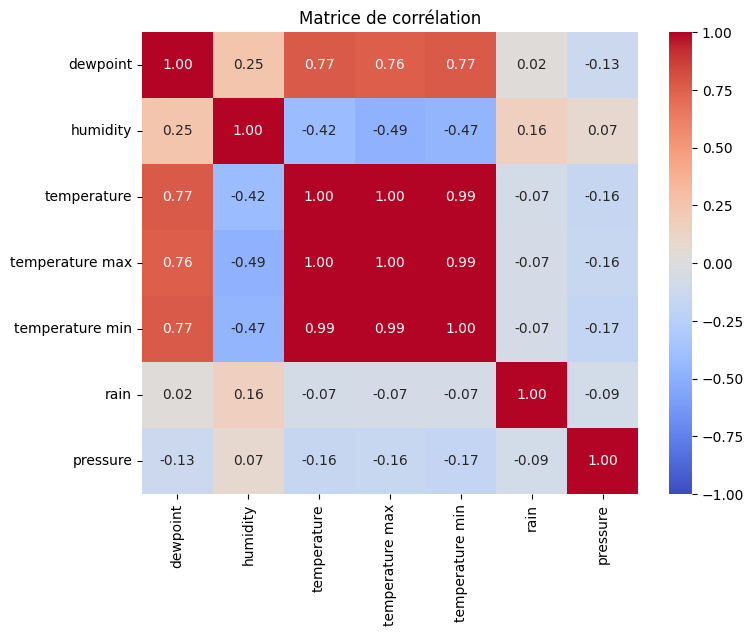

In [77]:
plt.figure(figsize=(8, 6))
sns.heatmap(colonnes_num_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation')
plt.show()

Trop de valeurs manquantes pour la colonnes pressure (83% de données manquantes), faible corrélation avec les autres colonnes, on ne travaillera pas sur avec cette colonne.

In [78]:
df.drop('pressure', axis=1, inplace=True)

/tmp/ipykernel_18358/3401430350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('pressure', axis=1, inplace=True)


In [79]:
df.head()

,date,dewpoint,humidity,temperature,temperature max,temperature min,rain
0,2023-01-01 00:00:00,10.0,94.0,11.0,11.0,9.7,0.0
1,2023-01-01 01:00:00,9.2,92.0,10.4,10.9,9.9,0.0
2,2023-01-01 02:00:00,9.2,95.0,9.9,10.3,9.0,0.0
3,2023-01-01 03:00:00,8.4,92.0,9.6,10.1,9.5,0.0
4,2023-01-01 04:00:00,8.0,89.0,9.7,10.5,9.7,0.0


on va utiliser l'inputation par interpolation pour remplir les valeurs NaN dans nos données.

In [80]:
df.interpolate(method='linear', inplace=True)

/tmp/ipykernel_18358/2868764835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.interpolate(method='linear', inplace=True)


In [81]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 560346 │ │ float64     │ 6     │                                                          │
│ │ Number of columns │ 7      │ │ datetime64  │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name           ┃ NA   ┃ NA %   ┃ mean     ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ dewpoint              │    0 │      0 │      6.7 │      6 │   -46 │   3.9 │   7.1 │  9.7 │    26 │    ▂▇▁  │  │
│ │ humidity              │    0 │      0 │       76 │     18 │     2 │    65 │    79 │   93 │   100 │   ▁▃▅▇  │  │
│ │ temperature           │    0 │      0 │       14 │    7.8 │   -13 │   8.5 │    13 │   19 │    42 │   ▂▇▆▂  │  │
│ │ temperature max       │    0 │      0 │       15 │    7.5 │   -10 │   9.4 │    14 │   20 │    43 │   ▂▇▅▂  │  │
│ │ temperature min       │    0 │      0 │       14 │    7.4 │   -11 │   8.3 │    13 │   19 │    42 │   ▃▇▅▁  │  │
│ │ rain                  │    0 │      0 │    0.098 │   0.72 │     0 │     0 │     0 │    0 │    77 │    ▇    │  │
│ └───────────────────────┴──────┴────────┴──────────┴────────┴───────┴───────┴───────┴──────┴───────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA    ┃ NA %     ┃ first            ┃ last                           ┃ frequency      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩  │
│ │ date               │     0 │        0 │    2023-01-01    │      2024-03-20 03:00:00       │ None           │  │
│ └────────────────────┴───────┴──────────┴──────────────────┴────────────────────────────────┴────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

On va commencer par une regression linéaire : 

Prédiction de la colonne: dewpoint


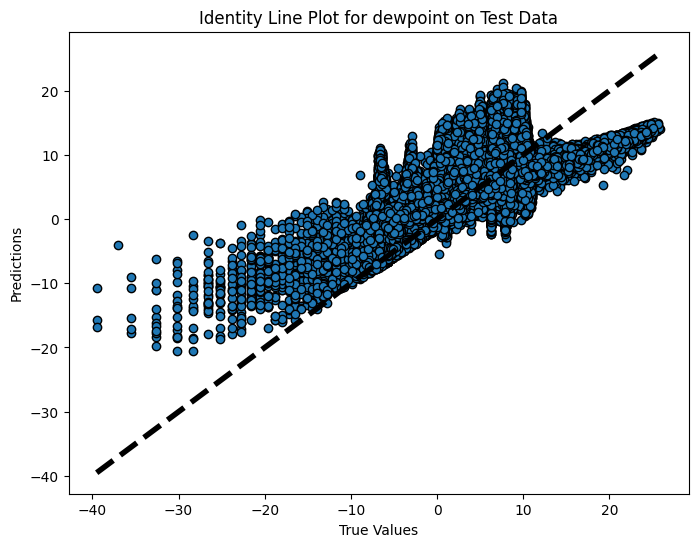

Scores d'entraînement - MSE: 19.72138872551713, RMSE: 4.440877022111413, MAE: 3.4750216330936414, R2: 0.45597494194072596
Scores de test - MSE: 19.84077516760585, RMSE: 4.454298504546575, MAE: 3.4825472189242217, R2: 0.4560383017136287

 ------------------------------------------------------ 
Prédiction de la colonne: humidity


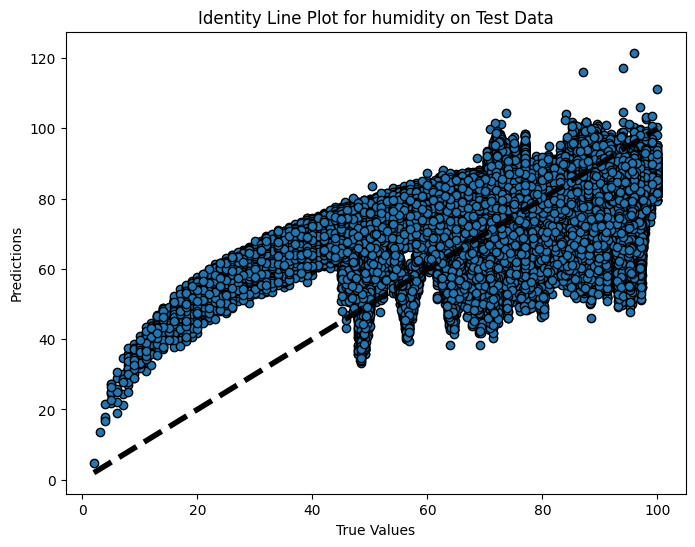

Scores d'entraînement - MSE: 247.67285143148058, RMSE: 15.737625342836212, MAE: 12.962322627473007, R2: 0.27129625672348356
Scores de test - MSE: 248.00949040928552, RMSE: 15.748317065937094, MAE: 12.965515998679932, R2: 0.27364133475547536

 ------------------------------------------------------ 
Prédiction de la colonne: temperature


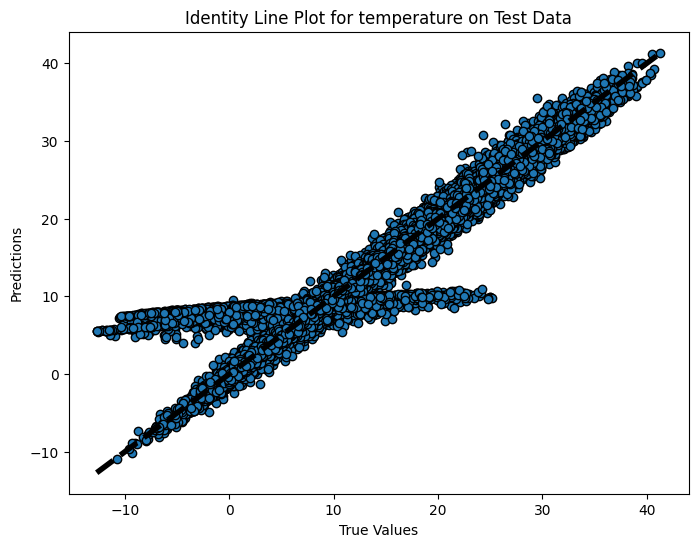

Scores d'entraînement - MSE: 2.8139392485864545, RMSE: 1.6774800292660579, MAE: 0.8598374685009658, R2: 0.9531157394322491
Scores de test - MSE: 2.9295879439289796, RMSE: 1.7116039097667952, MAE: 0.8691639912183935, R2: 0.9517095789126224

 ------------------------------------------------------ 
Prédiction de la colonne: temperature max


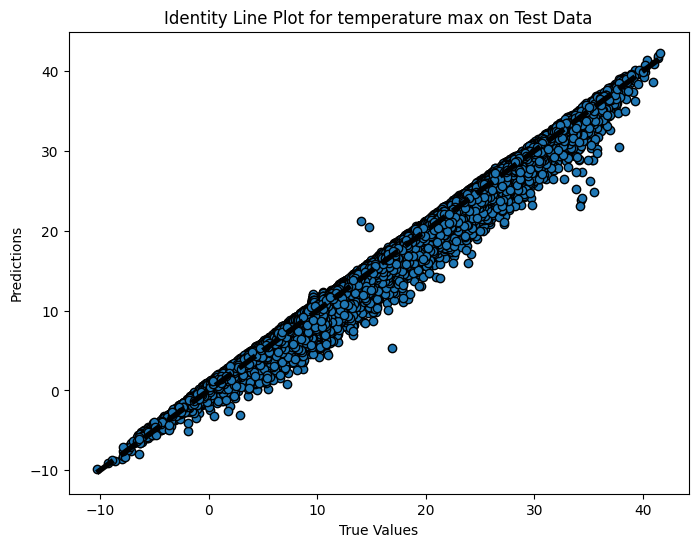

Scores d'entraînement - MSE: 0.7574476424218464, RMSE: 0.8703146801139495, MAE: 0.6239893567886348, R2: 0.9866144534782401
Scores de test - MSE: 0.7573079589571439, RMSE: 0.8702344275866957, MAE: 0.6241570624088573, R2: 0.9867047491313087

 ------------------------------------------------------ 
Prédiction de la colonne: temperature min


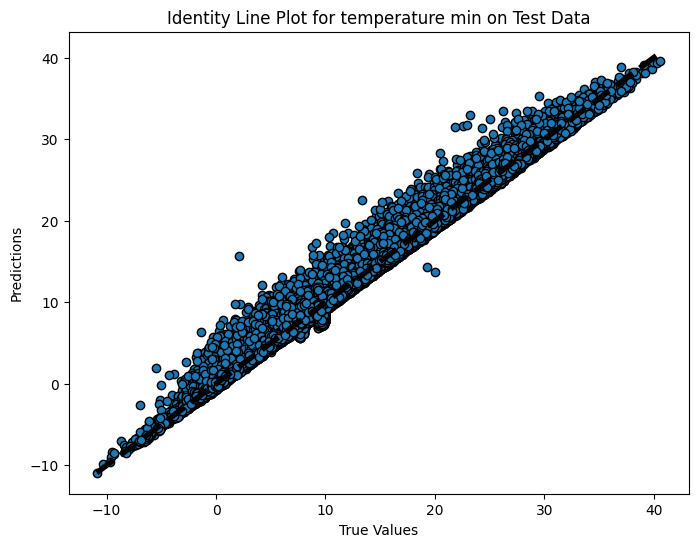

Scores d'entraînement - MSE: 0.7645589538327409, RMSE: 0.8743906185640036, MAE: 0.6134668340019849, R2: 0.9859049618623087
Scores de test - MSE: 0.7602198733432095, RMSE: 0.8719058855995924, MAE: 0.6125194470386347, R2: 0.9860811416819396

 ------------------------------------------------------ 
Prédiction de la colonne: rain


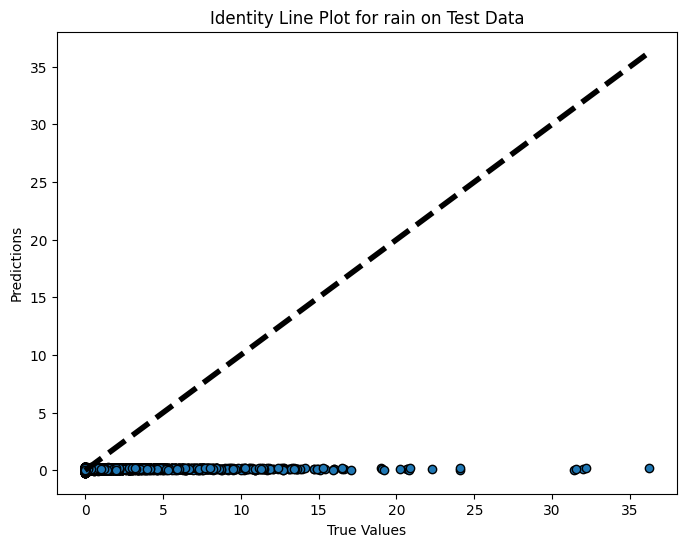

Scores d'entraînement - MSE: 0.5210970996412739, RMSE: 0.721870556014909, MAE: 0.18239423427957188, R2: 0.008264039400242229
Scores de test - MSE: 0.4563674554153488, RMSE: 0.6755497431095276, MAE: 0.18065661750930115, R2: 0.009280672818473779

 ------------------------------------------------------ 


In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_predict
from joblib import dump


for target_column in df.drop(columns=['date']).columns:
    print(f"Prédiction de la colonne: {target_column}")

    features = df.drop(columns=['date', target_column])
    target = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('linear_regression', LinearRegression())
    ])
    
    y_train_pred = cross_val_predict(pipe, X_train, y_train, cv=5)

    
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'Identity Line Plot for {target_column} on Test Data')
    plt.show()

    print(f"Scores d'entraînement - MSE: {train_mse}, RMSE: {train_rmse}, MAE: {train_mae}, R2: {train_r2}")
    print(f"Scores de test - MSE: {test_mse}, RMSE: {test_rmse}, MAE: {test_mae}, R2: {test_r2}\n")
    print(' ------------------------------------------------------ ')


On va refaire la même chose en enlevant les outliers avec isolation forest.

In [42]:
from sklearn.ensemble import IsolationForest


features = df.drop(columns=['date'])


iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
outliers = iso_forest.fit_predict(features)

df['outlier'] = outliers

df_cleaned = df[df['outlier'] == 1].drop(columns=['outlier'])

print(f"Nombre d'outliers détectés : {len(df[df['outlier'] == -1])}")
print(f"Taille du DataFrame nettoyé (df_cleaned) : {len(df_cleaned)}")

Nombre d'outliers détectés : 83277
Taille du DataFrame nettoyé (df_cleaned) : 477069


/tmp/ipykernel_18358/2150011897.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outlier'] = outliers


In [43]:
df_cleaned.shape

(477069, 7)

In [44]:
df.drop(columns='outlier', inplace= True)

/tmp/ipykernel_18358/3900003054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='outlier', inplace= True)


Prédiction de la colonne: dewpoint


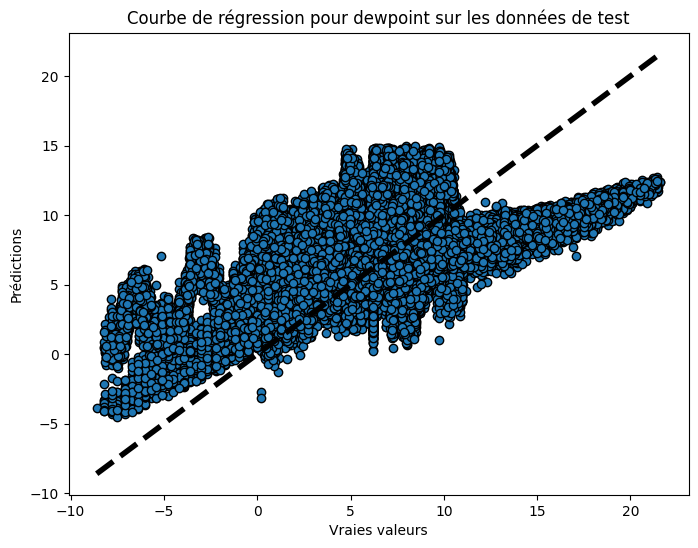

Scores d'entraînement - MSE: 14.036188244339527, RMSE: 3.746490123347388, MAE: 2.97576203211259, R2: 0.3777588183594013
Scores de test - MSE: 14.128027489750155, RMSE: 3.758726844258592, MAE: 2.984628301338661, R2: 0.3740860224261039

 ------------------------------------------------------ 
Modèle pour dewpoint sauvegardé sous : modeldewpoint.joblib
Prédiction de la colonne: humidity


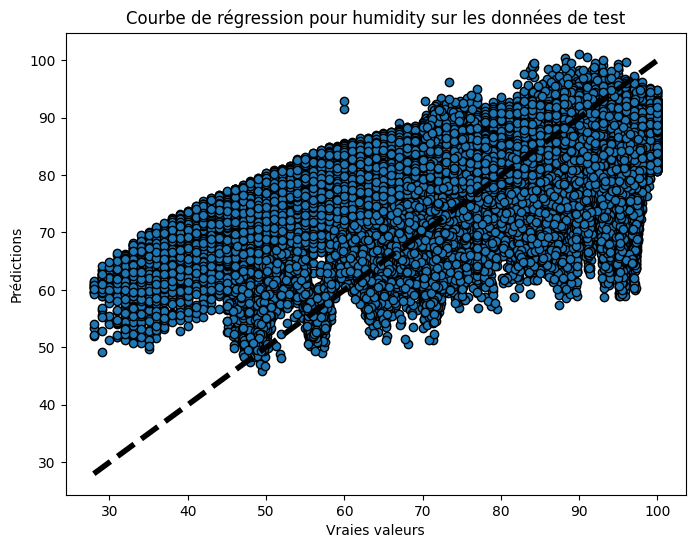

Scores d'entraînement - MSE: 192.73975119629353, RMSE: 13.88307427035862, MAE: 11.497298772394752, R2: 0.2467515780343098
Scores de test - MSE: 193.5394137607587, RMSE: 13.91184436948454, MAE: 11.502332813259427, R2: 0.24292334737551402

 ------------------------------------------------------ 
Modèle pour humidity sauvegardé sous : modelhumidity.joblib
Prédiction de la colonne: temperature


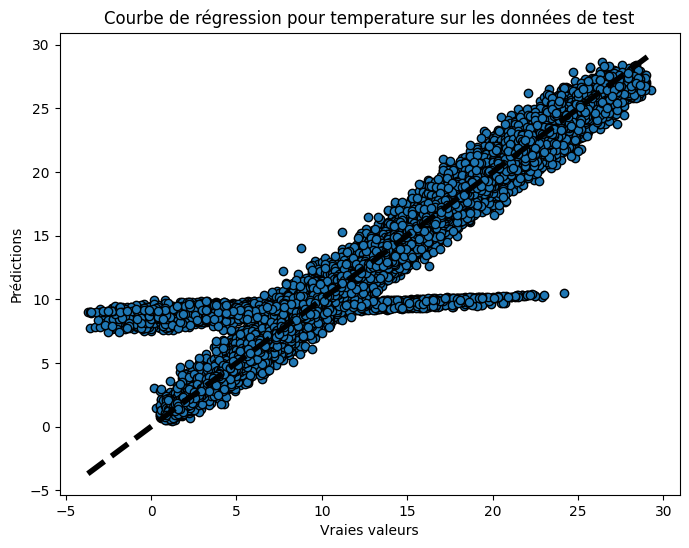

Scores d'entraînement - MSE: 1.314109962223236, RMSE: 1.1463463535176601, MAE: 0.5967745592315561, R2: 0.9644155440129849
Scores de test - MSE: 1.3551197520221732, RMSE: 1.164096109443792, MAE: 0.6011737982228945, R2: 0.9633638022661151

 ------------------------------------------------------ 
Modèle pour temperature sauvegardé sous : modeltemperature.joblib
Prédiction de la colonne: temperature max


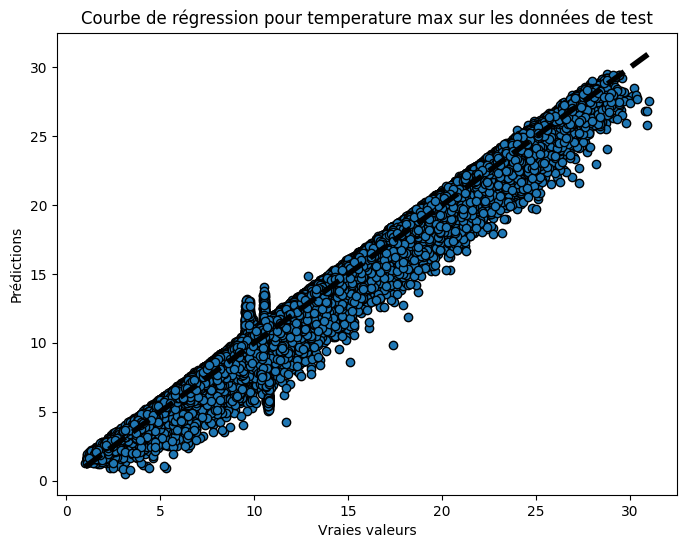

Scores d'entraînement - MSE: 0.6395440537539614, RMSE: 0.799714982824482, MAE: 0.5715503090034576, R2: 0.982299803655421
Scores de test - MSE: 0.6490544614295757, RMSE: 0.8056391632918398, MAE: 0.5738990495791539, R2: 0.9819991954753526

 ------------------------------------------------------ 
Modèle pour temperature max sauvegardé sous : modeltemperature max.joblib
Prédiction de la colonne: temperature min


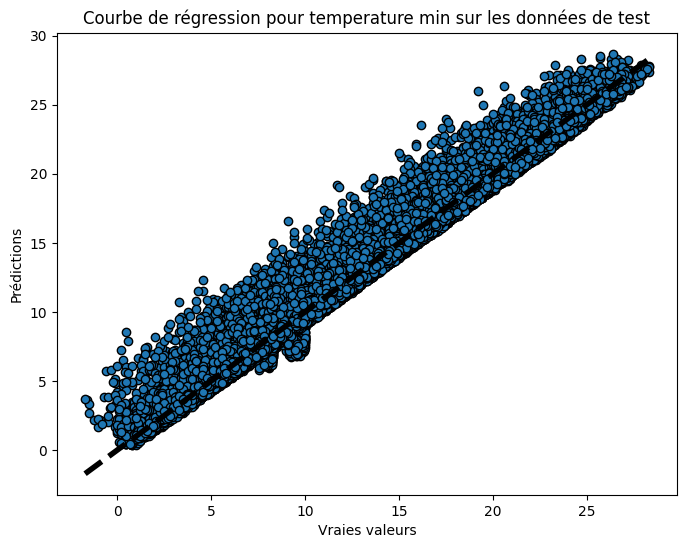

Scores d'entraînement - MSE: 0.708850044584945, RMSE: 0.841932327794191, MAE: 0.5846687918392852, R2: 0.9795886118264864
Scores de test - MSE: 0.7094836222846445, RMSE: 0.8423085077836057, MAE: 0.5857092755780653, R2: 0.9795601374522532

 ------------------------------------------------------ 
Modèle pour temperature min sauvegardé sous : modeltemperature min.joblib
Prédiction de la colonne: rain


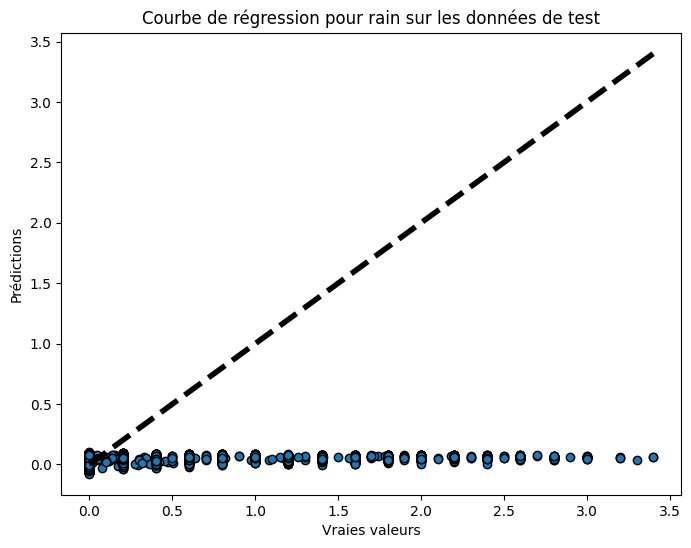

Scores d'entraînement - MSE: 0.03949030003911989, RMSE: 0.1987216647452408, MAE: 0.06783200469336223, R2: 0.01858841943888856
Scores de test - MSE: 0.03862157718207307, RMSE: 0.1965237318546365, MAE: 0.06712409248699869, R2: 0.017856820766590453

 ------------------------------------------------------ 
Modèle pour rain sauvegardé sous : modelrain.joblib


In [45]:
for target_column in df_cleaned.drop(columns=['date']).columns:
    print(f"Prédiction de la colonne: {target_column}")

    features = df_cleaned.drop(columns=['date', target_column])
    target = df_cleaned[target_column]

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('linear_regression', LinearRegression())
    ])
    

    y_train_pred = cross_val_predict(pipe, X_train, y_train, cv=5)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    
    test_mse = mean_squared_error(y_test, y_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Vraies valeurs')
    plt.ylabel('Prédictions')
    plt.title(f'Courbe de régression pour {target_column} sur les données de test')
    plt.show()

    print(f"Scores d'entraînement - MSE: {train_mse}, RMSE: {train_rmse}, MAE: {train_mae}, R2: {train_r2}")
    print(f"Scores de test - MSE: {test_mse}, RMSE: {test_rmse}, MAE: {test_mae}, R2: {test_r2}\n")
    print(' ------------------------------------------------------ ')

    model_filename = f'model{target_column}.joblib'
    dump(pipe, model_filename)
    print(f"Modèle pour {target_column} sauvegardé sous : {model_filename}")




Pour les colonnes temperature, temperature min et temperature max, la regression linéaire semble bien fonctionner.

On va tester la regression polynomiale pour humidity et dewpoint.

La colonne rain est très difficile à prédire car les valeurs sont très proches de 0 dans tout le dataset.


REGRESSION POLYNOMIALE : 

Régression polynomiale pour la colonne: humidity

Traitement du degré 2:


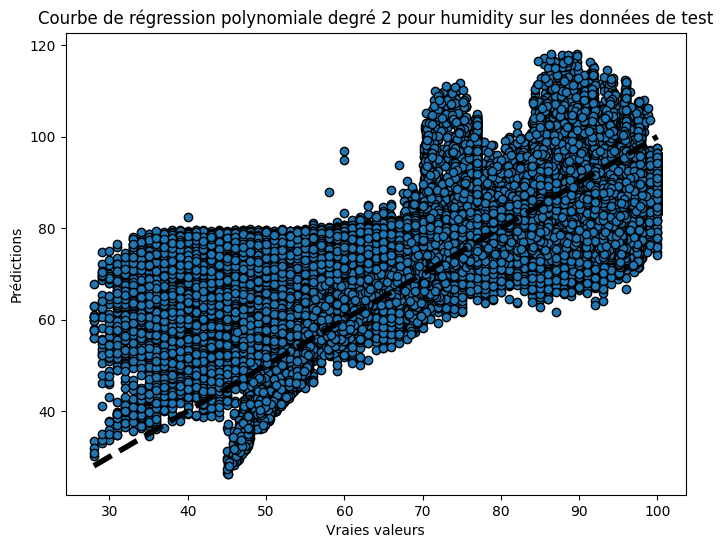

Scores d'entraînement pour degré 2 - MSE: 149.484399160924, RMSE: 12.22638127824108, MAE: 9.744525671554781, R2: 0.41579831312648974
Scores de test pour degré 2 - MSE: 149.9867839456064, RMSE: 12.246909158869693, MAE: 9.749654637164532, R2: 0.41329008845807014

 ------------------------------------------------------ 

Traitement du degré 3:


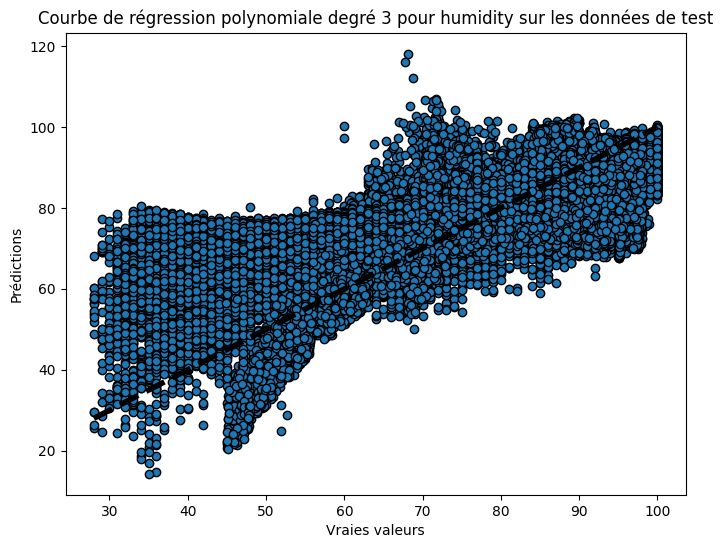

Scores d'entraînement pour degré 3 - MSE: 139.4397859196852, RMSE: 11.808462470604935, MAE: 9.457468144189578, R2: 0.45505378080379943
Scores de test pour degré 3 - MSE: 140.01055110586464, RMSE: 11.832605423399558, MAE: 9.468804259496492, R2: 0.4523145580343314

 ------------------------------------------------------ 

Traitement du degré 4:


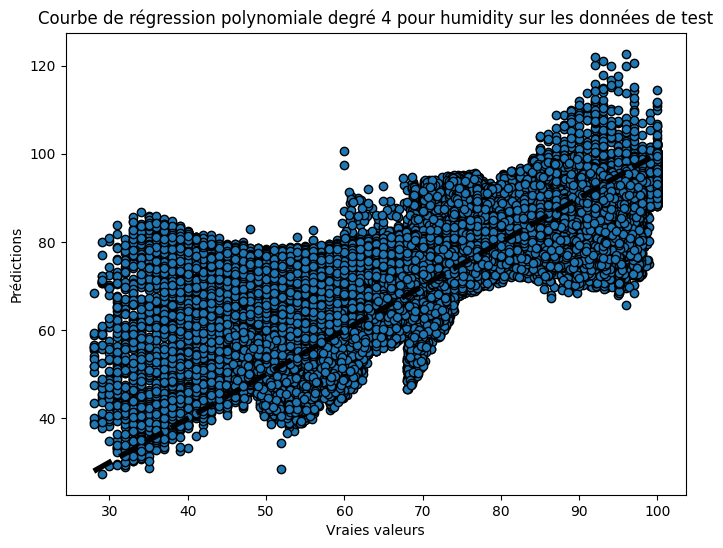

Scores d'entraînement pour degré 4 - MSE: 118.38526399428756, RMSE: 10.880499252988695, MAE: 8.271819827165537, R2: 0.5373371982986995
Scores de test pour degré 4 - MSE: 118.62800660694045, RMSE: 10.891648479772952, MAE: 8.279286300415647, R2: 0.5359575995176052

 ------------------------------------------------------ 
Régression polynomiale pour la colonne: dewpoint

Traitement du degré 2:


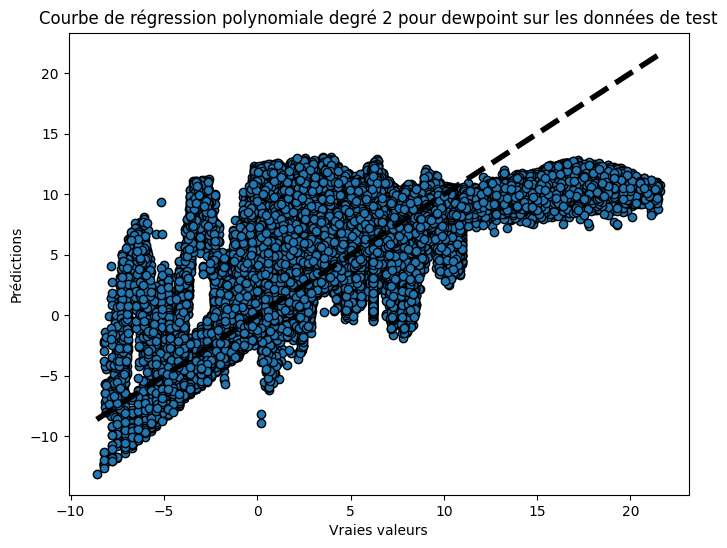

Scores d'entraînement pour degré 2 - MSE: 10.673551669459236, RMSE: 3.267040200159655, MAE: 2.3619515161362448, R2: 0.5268285600412439
Scores de test pour degré 2 - MSE: 10.732157856669346, RMSE: 3.2759972308702197, MAE: 2.366475818866886, R2: 0.5245332289385543

 ------------------------------------------------------ 

Traitement du degré 3:


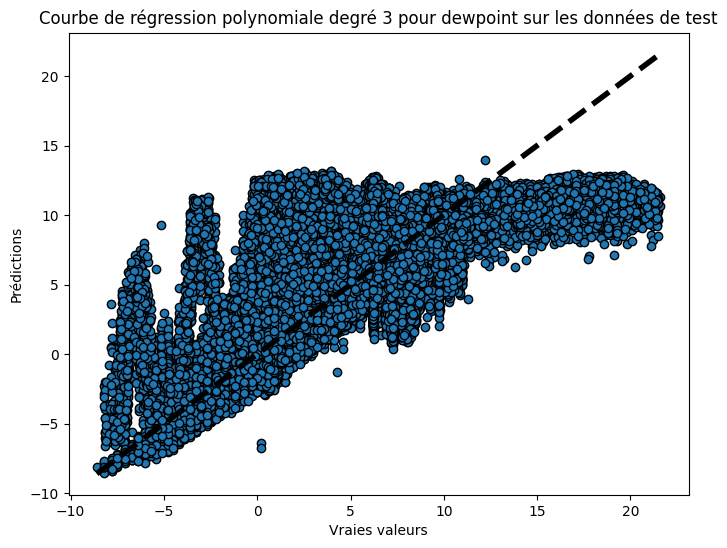

Scores d'entraînement pour degré 3 - MSE: 10.14065582249808, RMSE: 3.1844396402660986, MAE: 2.369306796354666, R2: 0.5504524767152169
Scores de test pour degré 3 - MSE: 10.181621334131364, RMSE: 3.190865295516463, MAE: 2.3725206957730016, R2: 0.5489236475494641

 ------------------------------------------------------ 

Traitement du degré 4:


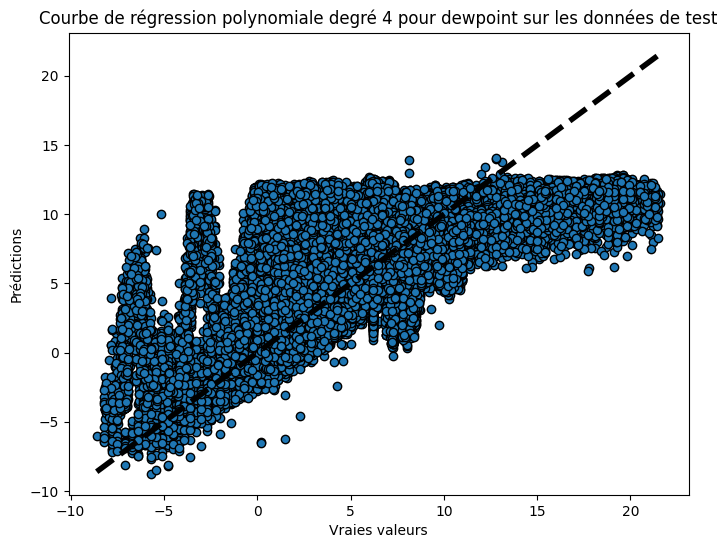

Scores d'entraînement pour degré 4 - MSE: 9.940297003189366, RMSE: 3.1528236555807188, MAE: 2.322062997352112, R2: 0.5593346252236658
Scores de test pour degré 4 - MSE: 9.965990587099112, RMSE: 3.156895720022933, MAE: 2.3229569747752596, R2: 0.5584767361642835

 ------------------------------------------------------ 


In [46]:
from sklearn.preprocessing import PolynomialFeatures

degrees = [2, 3, 4]
for target_column in ['humidity', 'dewpoint']:
    print(f"Régression polynomiale pour la colonne: {target_column}")

    features = df_cleaned.drop(columns=['date', target_column])
    target = df_cleaned[target_column]

    for degree in degrees:
        print(f"\nTraitement du degré {degree}:")

        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=degree)),
            ('linear_regression', LinearRegression())
        ])
        
        y_train_pred = cross_val_predict(pipe, X_train, y_train, cv=5)

       
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_r2 = r2_score(y_train, y_train_pred)

        
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)


        test_mse = mean_squared_error(y_test, y_pred)
        test_rmse = np.sqrt(test_mse)
        test_mae = mean_absolute_error(y_test, y_pred)
        test_r2 = r2_score(y_test, y_pred)

        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
        plt.xlabel('Vraies valeurs')
        plt.ylabel('Prédictions')
        plt.title(f'Courbe de régression polynomiale degré {degree} pour {target_column} sur les données de test')
        plt.show()

        print(f"Scores d'entraînement pour degré {degree} - MSE: {train_mse}, RMSE: {train_rmse}, MAE: {train_mae}, R2: {train_r2}")
        print(f"Scores de test pour degré {degree} - MSE: {test_mse}, RMSE: {test_rmse}, MAE: {test_mae}, R2: {test_r2}\n")
        print(' ------------------------------------------------------ ')



Les résultats ne sont pas concluants, on va tester XGBoost.

On a beaucoup trop de données pour entrainer un modèle de gradiant boosting, on va donc procéder à un échantillonnage stratifié qui pourrait être pertinent pour conserver les tendances saisonnières de nos données.

In [47]:
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

df_cleaned['month'] = df_cleaned['date'].dt.month

stratified_sample = pd.DataFrame()

for i in range(1, 13):
    df_month = df_cleaned[df_cleaned['month'] == i]
    sample = df_month.sample(frac=0.5)
    stratified_sample = pd.concat([stratified_sample, sample])

In [48]:
stratified_sample.head()

,date,dewpoint,humidity,temperature,temperature max,temperature min,rain,month
294226,2023-01-14 16:00:00,0.493171,60.234406,11.7,13.8,11.7,0.0,1
505455,2024-01-13 20:00:00,5.358390,77.656036,5.9,6.1,5.4,0.0,1
139244,2023-01-28 03:00:00,7.476468,89.091762,2.3,2.3,1.8,0.0,1
136998,2024-01-13 17:00:00,2.900000,51.000000,12.7,13.0,12.2,0.0,1
217896,2024-01-22 14:00:00,10.572216,87.537004,5.5,6.3,4.8,0.0,1


In [49]:
stratified_sample.shape

(238538, 8)

In [50]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Optimisation des hyperparamètres pour dewpoint
Meilleurs paramètres pour dewpoint: {'xgbregressor__alpha': 1, 'xgbregressor__colsample_bytree': 0.7, 'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 7, 'xgbregressor__n_estimators': 200}


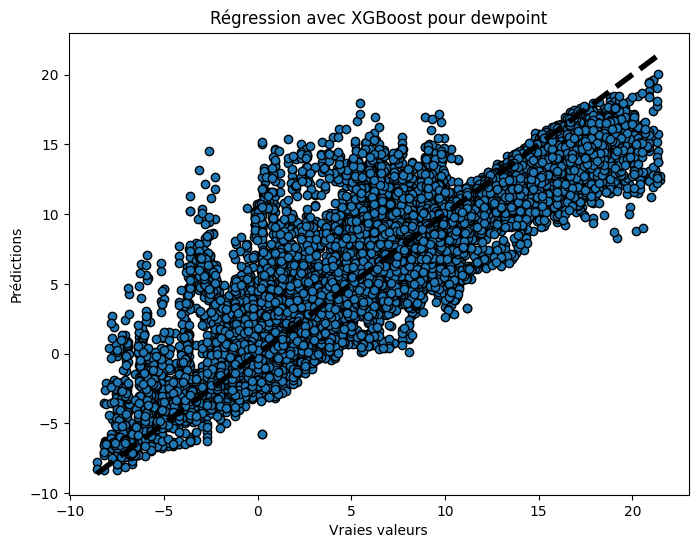

Scores d'entraînement - MSE: 4.528723200011129, RMSE: 2.128079697758317, MAE: 1.3932578181357267, R2: 0.8001054591550131
Scores de test - MSE: 4.656078104406594, RMSE: 2.1577947317589303, MAE: 1.4157932509093716, R2: 0.791930546430057

------------------------------------------------------
Optimisation des hyperparamètres pour humidity
Meilleurs paramètres pour humidity: {'xgbregressor__alpha': 1, 'xgbregressor__colsample_bytree': 0.7, 'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 7, 'xgbregressor__n_estimators': 200}


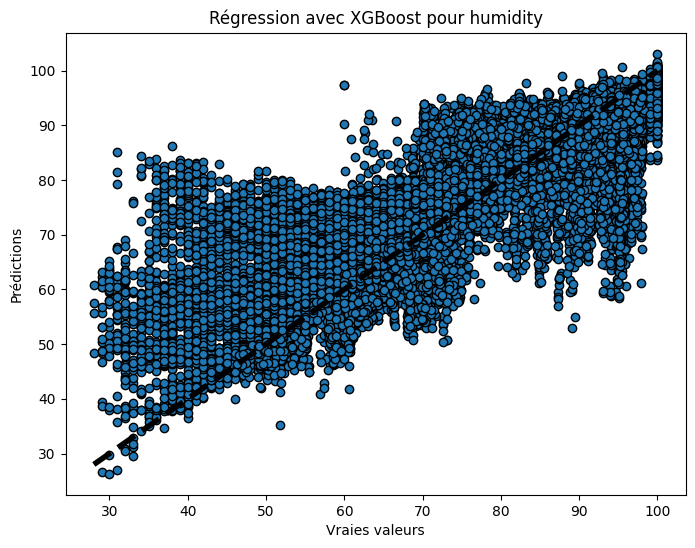

Scores d'entraînement - MSE: 58.54872245255964, RMSE: 7.65171369384399, MAE: 5.035858782977475, R2: 0.770520809398854
Scores de test - MSE: 62.92175724786359, RMSE: 7.932323571808174, MAE: 5.207113122707189, R2: 0.7548085823287656

------------------------------------------------------


In [51]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

param_grid = {
    'xgbregressor__colsample_bytree': [0.3, 0.7],
    'xgbregressor__learning_rate': [0.01, 0.1],
    'xgbregressor__max_depth': [3, 5, 7],
    'xgbregressor__alpha': [1, 10],
    'xgbregressor__n_estimators': [50, 100, 200]
}

for target_column in ['dewpoint', 'humidity']:
    print(f"Optimisation des hyperparamètres pour {target_column}")

    features = stratified_sample.drop(columns=['date', target_column, 'month'])
    target = stratified_sample[target_column]

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('xgbregressor', xgb.XGBRegressor(objective='reg:squarederror'))
    ])

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"Meilleurs paramètres pour {target_column}: {grid_search.best_params_}")

    y_train_pred = grid_search.best_estimator_.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    
    y_pred = grid_search.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Vraies valeurs')
    plt.ylabel('Prédictions')
    plt.title(f'Régression avec XGBoost pour {target_column}')
    plt.show()

    print(f"Scores d'entraînement - MSE: {train_mse}, RMSE: {train_rmse}, MAE: {train_mae}, R2: {train_r2}")
    print(f"Scores de test - MSE: {test_mse}, RMSE: {test_rmse}, MAE: {test_mae}, R2: {test_r2}\n")
    print('------------------------------------------------------')

On va quand même essayer sur l'ensemble des données pour voir si ça change beaucoup les résultats du modèle. 

Optimisation des hyperparamètres pour dewpoint
Meilleurs paramètres pour dewpoint: {'xgbregressor__alpha': 1, 'xgbregressor__colsample_bytree': 0.7, 'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 7, 'xgbregressor__n_estimators': 200}


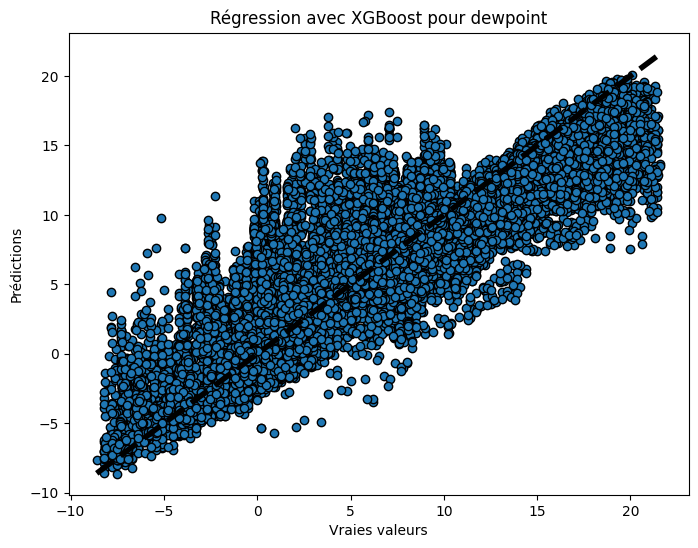

Scores d'entraînement - MSE: 3.601120164881123, RMSE: 1.8976617625069867, MAE: 1.2193543642499054, R2: 0.8403579926673421
Scores de test - MSE: 3.749054196314266, RMSE: 1.9362474522421627, MAE: 1.2373578239145715, R2: 0.8339056583902027

------------------------------------------------------
Modèle pour dewpoint sauvegardé sous : modelrain.joblib
Optimisation des hyperparamètres pour humidity
Meilleurs paramètres pour humidity: {'xgbregressor__alpha': 1, 'xgbregressor__colsample_bytree': 0.7, 'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 7, 'xgbregressor__n_estimators': 200}


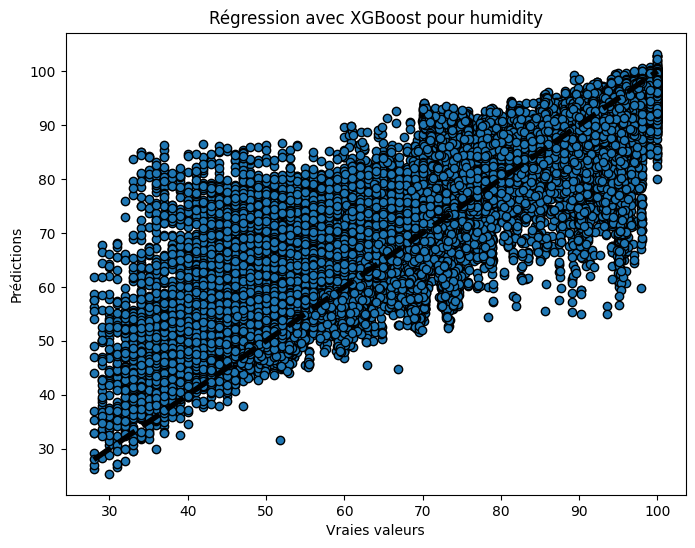

Scores d'entraînement - MSE: 43.936291754871014, RMSE: 6.628445651498624, MAE: 4.252781837465205, R2: 0.8282920766164339
Scores de test - MSE: 45.332294921262715, RMSE: 6.732926178212763, MAE: 4.328369831182046, R2: 0.8226716645055057

------------------------------------------------------
Modèle pour humidity sauvegardé sous : modelrain.joblib


In [52]:
param_grid = {
    'xgbregressor__colsample_bytree': [0.3, 0.7],
    'xgbregressor__learning_rate': [0.01, 0.1],
    'xgbregressor__max_depth': [3, 5, 7],
    'xgbregressor__alpha': [1, 10],
    'xgbregressor__n_estimators': [50, 100, 200]
}

for target_column in ['dewpoint', 'humidity']:
    print(f"Optimisation des hyperparamètres pour {target_column}")

    features = df_cleaned.drop(columns=['date', target_column])
    target = df_cleaned[target_column]

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('xgbregressor', xgb.XGBRegressor(objective='reg:squarederror'))
    ])

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"Meilleurs paramètres pour {target_column}: {grid_search.best_params_}")


    y_train_pred = grid_search.best_estimator_.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    
    y_pred = grid_search.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Vraies valeurs')
    plt.ylabel('Prédictions')
    plt.title(f'Régression avec XGBoost pour {target_column}')
    plt.show()

    print(f"Scores d'entraînement - MSE: {train_mse}, RMSE: {train_rmse}, MAE: {train_mae}, R2: {train_r2}")
    print(f"Scores de test - MSE: {test_mse}, RMSE: {test_rmse}, MAE: {test_mae}, R2: {test_r2}\n")
    print('------------------------------------------------------')

    modelfilename = f'model{target_column}.joblib'
    dump(pipe, model_filename)
    print(f"Modèle pour {target_column} sauvegardé sous : {model_filename}")

On a de bien meilleurs résultats sur en utilisant toutes les données sans pour autant que ça soit trop couteux. 

In [94]:
df_visu = pd.read_csv("H_20_latest-2023-2024.csv", sep = ";")
df_visu = df_visu[['AAAAMMJJHH', 'TD', 'U', ' T', 'TX', 'TN', 'RR1', 'PSTAT']]
df_visu.head()


,AAAAMMJJHH,TD,U,T,TX,TN,RR1,PSTAT
0,2023010100,10.0,94.0,11.0,11.0,9.7,0.0,1029.4
1,2023010101,9.2,92.0,10.4,10.9,9.9,0.0,1029.4
2,2023010102,9.2,95.0,9.9,10.3,9.0,0.0,1029.3
3,2023010103,8.4,92.0,9.6,10.1,9.5,0.0,1028.9
4,2023010104,8.0,89.0,9.7,10.5,9.7,0.0,1028.6


In [6]:
import pandas as pd
from datetime import datetime, timedelta
from joblib import load

model_temperature = load('modeltemperature.joblib')
model_temperature_max = load('modeltemperature max.joblib')
model_temperature_min = load('modeltemperature min.joblib')
model_dewpoint = load('modeldewpoint.joblib')
model_humidity = load('modelhumidity.joblib')

#adapter cette ligne pour qu'il prenne le bon csv (données METEO FRANCE)
df = pd.read_csv("H_20_latest-2023-2024.csv", sep=";")


df['AAAAMMJJHH'] = pd.to_datetime(df['AAAAMMJJHH'], format='%Y%m%d%H')
df = df[['AAAAMMJJHH', 'TD', 'U', ' T', 'TX', 'TN', 'RR1']]
df.rename(columns={
    'AAAAMMJJHH': 'date',
    'TD': 'dewpoint',
    'U': 'humidity',
    ' T': 'temperature',
    'TX': 'temperature max',
    'TN': 'temperature min',
    'RR1': 'rain'
}, inplace=True)

df.interpolate(method='linear', inplace=True)

today = datetime.now()
week_ago = today - timedelta(days=7)


data_last_week = df[(df['date'] >= week_ago) & (df['date'] <= today)]
last_entry = data_last_week.iloc[-1]

dates = pd.date_range(start=today + timedelta(days=1), periods=7, freq='D')
future_predictions = pd.DataFrame({
    'date': dates,
    'temperature': [model_temperature.predict([[last_entry['dewpoint'], last_entry['humidity'], last_entry['temperature max'], last_entry['temperature min'], last_entry['rain']]])[0] for _ in range(7)],
    'temperature max': [model_temperature_max.predict([[last_entry['dewpoint'], last_entry['humidity'], last_entry['temperature'], last_entry['temperature min'], last_entry['rain']]])[0] for _ in range(7)],
    'temperature min': [model_temperature_min.predict([[last_entry['dewpoint'], last_entry['humidity'], last_entry['temperature max'], last_entry['temperature'], last_entry['rain']]])[0] for _ in range(7)],
    'dewpoint': [model_dewpoint.predict([[last_entry['humidity'], last_entry['temperature'], last_entry['temperature max'], last_entry['temperature min'], last_entry['rain']]])[0] for _ in range(7)],
    'humidity': [model_humidity.predict([[last_entry['dewpoint'], last_entry['temperature'], last_entry['temperature max'], last_entry['temperature min'], last_entry['rain']]])[0] for _ in range(7)],
    'rain': [last_entry['rain']] * 7  
})

results = pd.concat([data_last_week, future_predictions])

#print si nécessaire
#print(results[['date', 'temperature', 'temperature max', 'temperature min', 'dewpoint', 'humidity', 'rain']])

#fichier crée avec les prévisions pour les 7 prochains jours et les données de la semaine précédente
results.to_csv("forecasted_weather_data.csv", index=False)


                            date  temperature  temperature max  \
11446 2024-04-21 22:00:00.000000    13.900000        14.300000   
11447 2024-04-21 23:00:00.000000    13.100000        13.900000   
11448 2024-04-22 00:00:00.000000    11.700000        13.100000   
11449 2024-04-22 01:00:00.000000    13.300000        13.500000   
11450 2024-04-22 02:00:00.000000    12.300000        13.300000   
...                          ...          ...              ...   
2     2024-05-01 21:53:48.272926     8.966565         8.649636   
3     2024-05-02 21:53:48.272926     8.966565         8.649636   
4     2024-05-03 21:53:48.272926     8.966565         8.649636   
5     2024-05-04 21:53:48.272926     8.966565         8.649636   
6     2024-05-05 21:53:48.272926     8.966565         8.649636   

       temperature min  dewpoint   humidity  rain  
11446        12.600000  8.500000  70.000000   0.0  
11447        13.000000  8.100000  72.000000   0.0  
11448        11.600000  7.000000  73.000000   0.0  

/home/marwan/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/marwan/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/marwan/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/marwan/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/marwan/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/marwan/.local/lib/python3.10/site-packages/sklearn/base.py:465: 